<a id='top'></a>

# House Pricing

### Import Module for Data Exploration

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Load File

In [2]:
df_train = pd.read_csv('train.csv', index_col=0)

### Look at Data

In [3]:
df_train.shape

(1460, 80)

In [4]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Columns with Numerical Data

In [5]:
print('Number of Numerical Columns : ', len(df_train.select_dtypes(exclude='object').columns))
print(df_train.select_dtypes(exclude=['object']).columns)

Number of Numerical Columns :  37
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [6]:
df_train.select_dtypes(exclude=['object']).describe().round(decimals=2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.0,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1379.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0
mean,56.9,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,567.24,1057.43,1162.63,346.99,5.84,1515.46,0.43,0.06,1.57,0.38,2.87,1.05,6.52,0.61,1978.51,1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.2
std,42.3,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63,0.64,24.69,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.5
min,20.0,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.0
25%,20.0,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,1129.50,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1961.00,1.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.0
50%,50.0,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,477.50,991.50,1087.00,0.00,0.00,1464.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1980.00,2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.0
75%,70.0,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,808.00,1298.25,1391.25,728.00,0.00,1776.75,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2002.00,2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.0
max,190.0,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,2336.00,6110.00,4692.00,2065.00,572.00,5642.00,3.00,2.00,3.00,2.00,8.00,3.00,14.00,3.00,2010.00,4.00,1418.00,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.0


### Columns with Categorical Data

In [7]:
print('Number of Categorical Columns : ', len(df_train.select_dtypes(include='object').columns))
print(df_train.select_dtypes(include=['object']).columns)

Number of Categorical Columns :  43
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [8]:
df_train.select_dtypes(include=['object']).describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


<a id='explore_num_columns'></a>

## Exploration of Numerical Columns

##### Target Skewness

<Figure size 432x288 with 0 Axes>

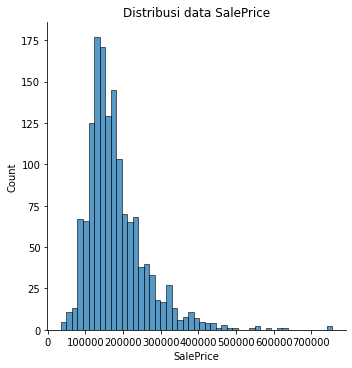

In [9]:
df_target = df_train.SalePrice
plt.figure()
sns.displot(df_target)
plt.title('Distribusi data SalePrice')
plt.show()

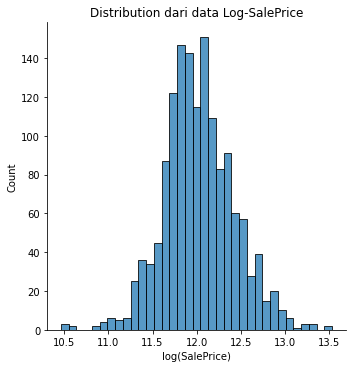

In [10]:
#menerapkan logartimik ke data target
sns.displot(np.log(df_target))
plt.title('Distribution dari data Log-SalePrice')
plt.xlabel('log(SalePrice)')
plt.show()

In [11]:
print('SalePrice skew : ' + str(df_target.skew().round(decimals=2)) + '\n'
      'Log-SalePrice skew : ' + 
      str(np.log(df_target).skew().round(decimals=2)))

SalePrice skew : 1.88
Log-SalePrice skew : 0.12


##### Numerical Columns Distribution

In [12]:
num_attributes = df_train.select_dtypes(exclude='object').drop('SalePrice', axis=1).copy()

##### Find Outliers

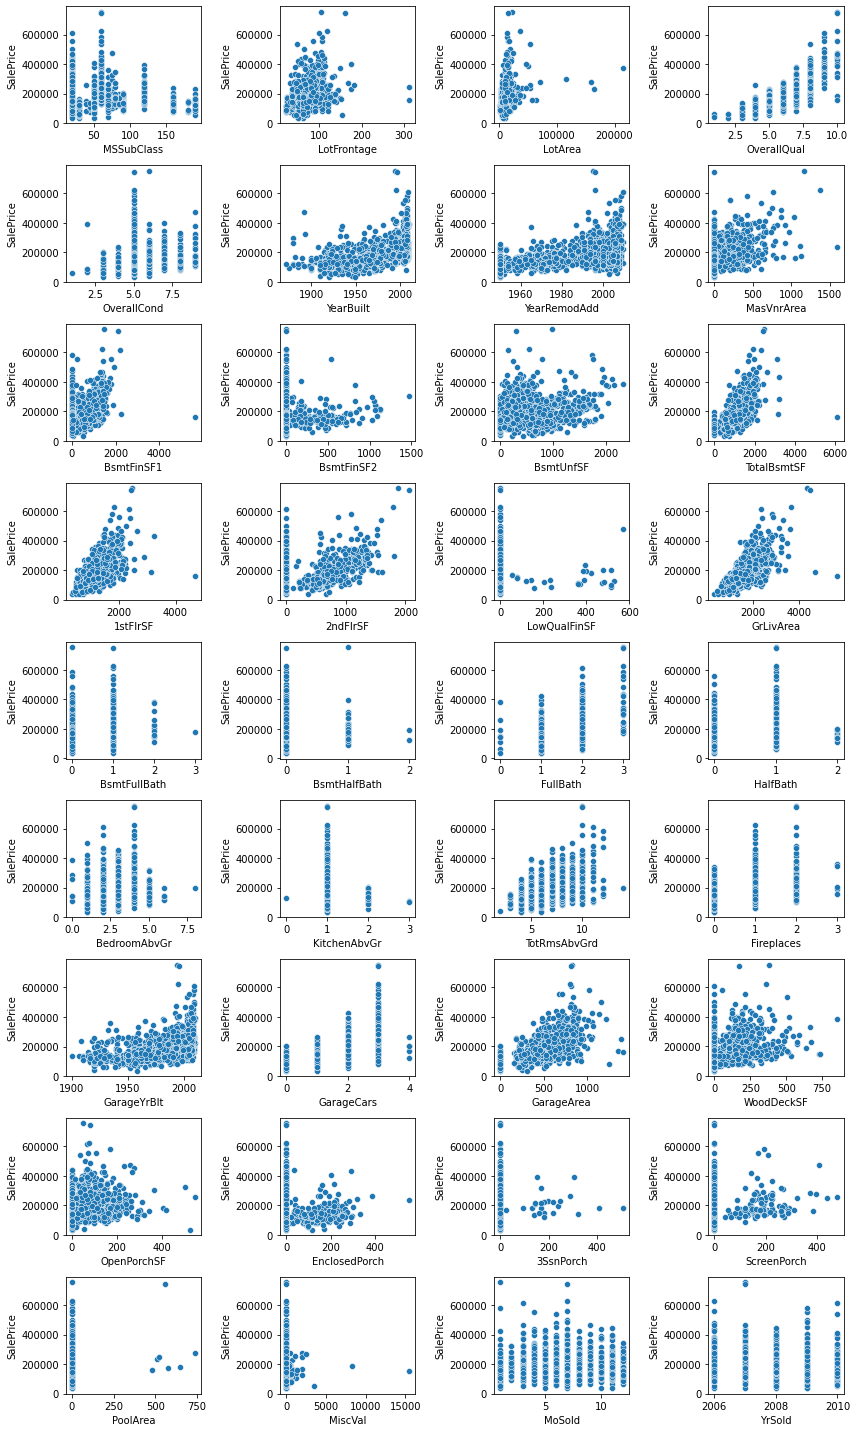

In [13]:
f = plt.figure(figsize=(12,20))

for i in range(len(num_attributes.columns)):
    f.add_subplot(9, 4, i+1)
    sns.scatterplot(num_attributes.iloc[:,i], df_target)
    
plt.tight_layout()
plt.show()

<a id='notes_outliers'></a>

__Outliers :__
* LotFrontage (>200) and LotArea (>100000).
* BsmtFinSF1 (>4000) and TotalBsmtSF (>6000)
* 1stFlrSF (>4000)
* GrLivArea (>4000 AND SalePrice <300000)
* LowQualFinSF (>550)

##### Correlation of Numerical Columns 

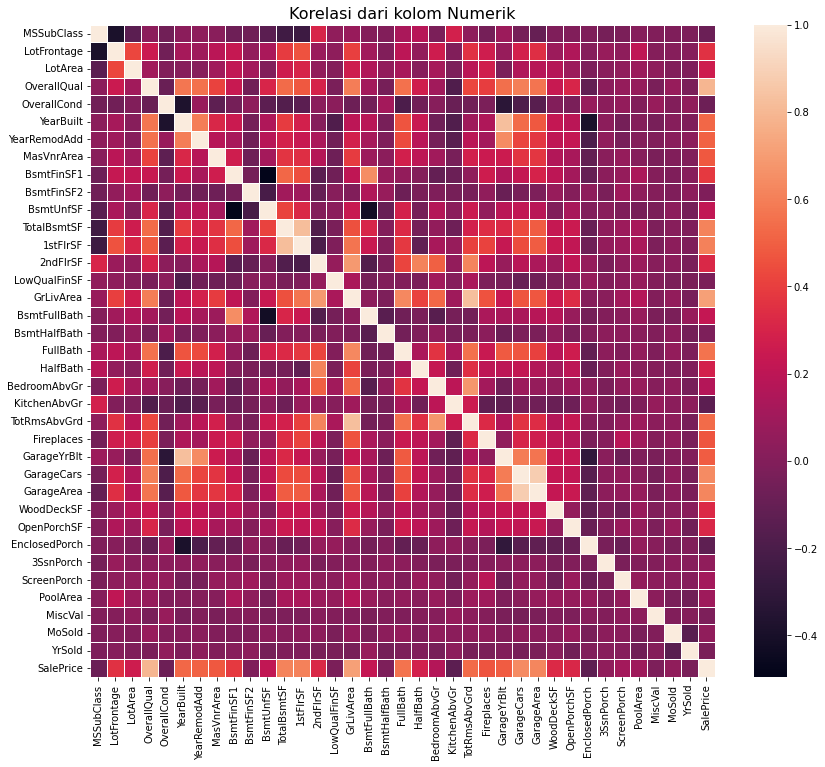

In [14]:
correlation = df_train.corr()

f, ax = plt.subplots(figsize=(14,12))
plt.title('Korelasi dari kolom Numerik', size=16)
sns.heatmap(correlation,linewidth=.5)
plt.show()

In [15]:
cor = df_train.drop('SalePrice',axis=1)
cor = cor.corr().abs().copy()
cor_unstack = cor.unstack()
list_cor = cor_unstack.sort_values(kind="quicksort",ascending=False)
list_cor[list_cor<1].drop_duplicates().head(10)

GarageCars    GarageArea      0.882475
GarageYrBlt   YearBuilt       0.825667
TotRmsAbvGrd  GrLivArea       0.825489
TotalBsmtSF   1stFlrSF        0.819530
GrLivArea     2ndFlrSF        0.687501
BedroomAbvGr  TotRmsAbvGrd    0.676620
BsmtFullBath  BsmtFinSF1      0.649212
YearRemodAdd  GarageYrBlt     0.642277
FullBath      GrLivArea       0.630012
2ndFlrSF      TotRmsAbvGrd    0.616423
dtype: float64

##### Correlation Numerical Columns with 'SalePrice'

In [16]:
correlation['SalePrice'].sort_values(ascending=False).head(15)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

__Base on that results of Correlation numerical columns and correlation numerical columns with 'SalePrice', we can remove some columns :__

1. GarageArea
2. GarageYearBuilt
3. TotRmsAbvGrd 
4. 1stFlrSF

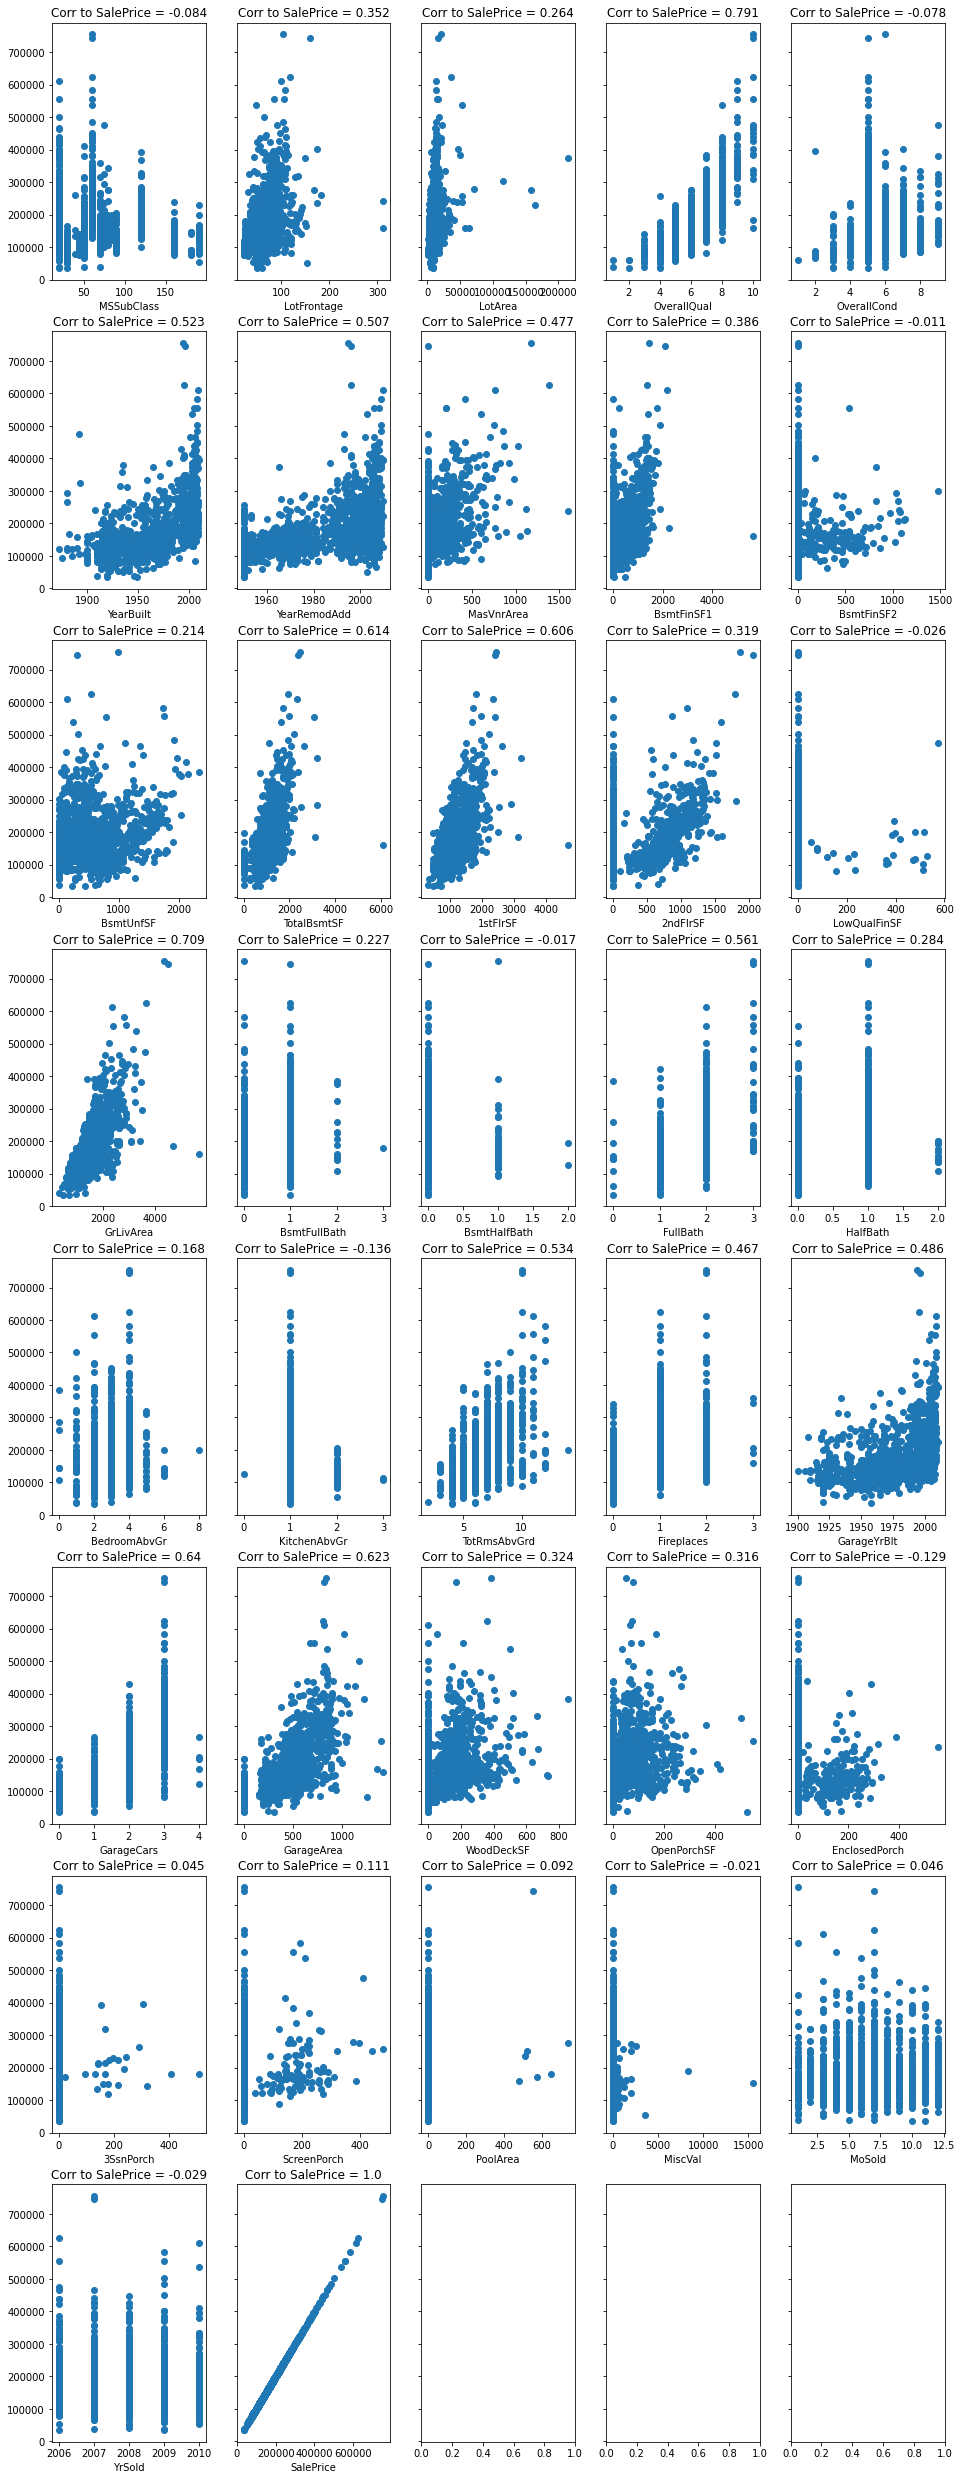

In [17]:
num_columns = df_train.select_dtypes(exclude='object').columns
corr_to_price = correlation['SalePrice']
n_cols = 5
n_rows = 8
fig, ax_arr = plt.subplots(n_rows, n_cols, figsize=(16,20), sharey=True)
plt.subplots_adjust(bottom=-0.8)
for j in range(n_rows):
    for i in range(n_cols):
        plt.sca(ax_arr[j, i])
        index = i + j*n_cols
        if index < len(num_columns):
            plt.scatter(df_train[num_columns[index]], df_train.SalePrice)
            plt.xlabel(num_columns[index])
            plt.title('Corr to SalePrice = '+ str(np.around(corr_to_price[index], decimals=3)))
plt.show()

##### Missing/null Values in Numerical Columns

In [18]:
num_attributes.isna().sum().sort_values(ascending=False).head()

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
WoodDeckSF        0
BedroomAbvGr      0
dtype: int64

## Explorations of Categorical Columns

In [19]:
cat_columns = df_train.select_dtypes(include='object').columns

##### Missing/null values in categorical columns

In [20]:
df_train[cat_columns].isna().sum().sort_values(ascending=False).head(17)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageType        81
GarageCond        81
GarageQual        81
GarageFinish      81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
MasVnrType         8
Electrical         1
Functional         0
dtype: int64

## Data Cleaning & Preprocessing

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

##### Dealing Missing/Null Value

In [22]:
train = df_train.copy()

# Missing/Null Value in Numerical Data
train.MasVnrArea = train.MasVnrArea.fillna(0)

# Missing/Null Value in Categorical Data
cat_cols_fill_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                     'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',
                     'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'BsmtCond',
                     'MasVnrType']
for i in cat_cols_fill_none:
    train[i] = train[i].fillna("None")

In [23]:
train.isna().sum().sort_values(ascending=False).head()

LotFrontage     259
GarageYrBlt      81
Electrical        1
KitchenAbvGr      0
GarageFinish      0
dtype: int64

##### Remove Outliers

In [24]:
train = train.drop(train['LotFrontage'][train['LotFrontage']>200].index)

train = train.drop(train['LotArea'][train['LotArea']>100000].index)

train = train.drop(train['BsmtFinSF1'][train['BsmtFinSF1']>4000].index)

train = train.drop(train['TotalBsmtSF'][train['TotalBsmtSF']>6000].index)

train = train.drop(train['1stFlrSF'][train['1stFlrSF']>4000].index)

train = train.drop(train.GrLivArea[(train['GrLivArea']>4000) & (df_target<300000)].index)

train = train.drop(train.LowQualFinSF[train['LowQualFinSF']>550].index)


##### Data Transformation for reduce Skewness

In [25]:
train['SalePrice'] = np.log(train['SalePrice'])
train = train.rename(columns={'SalePrice': 'SalePrice_log'})

## Feature Engineering

##### High Correlation Columns after Transformation

In [26]:
cor2 = train.drop('SalePrice_log',axis=1)
cor2 = cor2.corr().abs().copy()
cor_unstack = cor2.unstack()
list_cor2 = cor_unstack.sort_values(kind="quicksort",ascending=False)
list_cor2[list_cor2<1].drop_duplicates().head(10)

GarageArea    GarageCars      0.887485
GarageYrBlt   YearBuilt       0.828878
TotRmsAbvGrd  GrLivArea       0.828709
TotalBsmtSF   1stFlrSF        0.806549
GrLivArea     2ndFlrSF        0.695546
BedroomAbvGr  TotRmsAbvGrd    0.679893
BsmtFinSF1    BsmtFullBath    0.656799
YearRemodAdd  GarageYrBlt     0.643701
GrLivArea     FullBath        0.639224
TotRmsAbvGrd  2ndFlrSF        0.613943
dtype: float64

In [27]:
# SalePrice_log removed because data target
# 'MiscVal', 'MSSubClass', 'MoSold', 'YrSold' removed because looking scatter plot
# 'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd' removed because highly correlation with other features

attributes_drop = ['SalePrice_log', 'MiscVal', 'MSSubClass', 'MoSold', 'YrSold', 
                   'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd', '1stFlrSF'] 


# One-hot-encoding to transform all categorical data
X = train.drop(attributes_drop, axis=1)
X = pd.get_dummies(X)

# data target
y = train.SalePrice_log

# split using train_test_split dari scikit-learn
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Final imputation of missing data - to address those outstanding after previous section
my_imputer = SimpleImputer()
train_X = my_imputer.fit_transform(train_X)
val_X = my_imputer.transform(val_X)

<a id='algorithms'></a>

## Machine Learning

##### Import machine learning modules

In [28]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
#from xgboost import XGBRegressor

In [29]:
def inv_y(transformed_y):
    return np.exp(transformed_y)

mae_compare = pd.Series()
mae_compare.index.name = 'Algorithm'

##### DecisionTreeRegressor

In [30]:
# DecisionTreeRegressor ================================
iowa_model = DecisionTreeRegressor()
iowa_model.fit(train_X, train_y)
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(inv_y(val_predictions), inv_y(val_y))
mae_compare['DecisionTree'] = val_mae
print("Validation MAE for Decision Tree when not specifying max_leaf_nodes: {:,.0f}".format(val_mae))

Validation MAE for Decision Tree when not specifying max_leaf_nodes: 24,098


##### RandomForestRegressor

In [31]:
# Random Forest. Define the model. =============================
rf_model = RandomForestRegressor()
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(inv_y(rf_val_predictions), inv_y(val_y))
mae_compare['RandomForest'] = rf_val_mae
print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))

Validation MAE for Random Forest Model: 16,494


##### LinearRegression

In [32]:
# Linear Regression =================================================
linear_model = LinearRegression()
linear_model.fit(train_X, train_y)
linear_val_predictions = linear_model.predict(val_X)
linear_val_mae = mean_absolute_error(inv_y(linear_val_predictions), inv_y(val_y))
mae_compare['LinearRegression'] = linear_val_mae
print("Validation MAE for Linear Regression Model: {:,.0f}".format(linear_val_mae))

Validation MAE for Linear Regression Model: 14,419


##### Lasso

In [33]:
# Lasso ==============================================================
lasso_model = Lasso(alpha=0.0005, random_state=5)
lasso_model.fit(train_X, train_y)
lasso_val_predictions = lasso_model.predict(val_X)
lasso_val_mae = mean_absolute_error(inv_y(lasso_val_predictions), inv_y(val_y))
mae_compare['Lasso'] = lasso_val_mae
print("Validation MAE for Lasso Model: {:,.0f}".format(lasso_val_mae))


Validation MAE for Lasso Model: 13,687


##### Comparison MAE Values

In [34]:
print('MAE values for different algorithms:')
mae_compare.sort_values(ascending=True).round()

MAE values for different algorithms:


Algorithm
Lasso               13687.0
LinearRegression    14419.0
RandomForest        16494.0
DecisionTree        24098.0
dtype: float64

## Implementation Lasso Model

##### Cross Validation

In [35]:
from sklearn.model_selection import cross_val_score

imputer = SimpleImputer()
imputed_X = imputer.fit_transform(X)
n_folds = 10
scores = cross_val_score(lasso_model, imputed_X, y, scoring='neg_mean_squared_error',cv=n_folds)
lasso_mae_scores = np.sqrt(-scores)

print('For LASSO model:')
print('Mean RMSE = ' + str(lasso_mae_scores.mean().round(decimals=3)))
print('Error std deviation = ' +str(lasso_mae_scores.std().round(decimals=3)))

For LASSO model:
Mean RMSE = 0.109
Error std deviation = 0.016


##### Find Best HyperParameters

In [36]:
# Grid search for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
# Tuning Lasso
param_grid = [{'alpha': [0.0007, 0.0005, 0.005]}]
top_reg = Lasso()

# -------------------------------------------------------
grid_search = GridSearchCV(top_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error')

grid_search.fit(imputed_X, y)

grid_search.best_params_

{'alpha': 0.0005}

## Set Submission File

##### Load Data Test

In [37]:
test_data_path = 'test.csv'

test_data = pd.read_csv(test_data_path)

##### Data Test Preprocessing 

In [38]:
test_X = test_data.copy()

test_X.MasVnrArea = test_X.MasVnrArea.fillna(0)
for cat in cat_cols_fill_none:
    test_X[cat] = test_X[cat].fillna("None")
    
if 'SalePrice_log' in attributes_drop:
    attributes_drop.remove('SalePrice_log')

test_X = test_data.drop(attributes_drop, axis=1)

test_X = pd.get_dummies(test_X)

final_train, final_test = X.align(test_X, join='left', axis=1)

final_test_imputed = my_imputer.transform(final_test)

##### Create final model

In [39]:
final_model = Lasso(alpha=0.0005, random_state=5)
final_train_imputed = my_imputer.fit_transform(final_train)

final_model.fit(final_train_imputed, y)

Lasso(alpha=0.0005, random_state=5)

##### Prediction Data Test

In [40]:
test_preds = final_model.predict(final_test_imputed)

output = pd.DataFrame({'Id': test_data.Id,'SalePrice': inv_y(test_preds)})

output.to_csv('submission.csv', index=False)